이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

# 신경망 시작하기: 분류와 회귀

## 영화 리뷰 분류: 이진 분류 예제

### IMDB 데이터셋

**IMDB 데이터셋 로드하기**

In [7]:
imdb.load_data?

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

# num_words : 만개의 단어를 쓰겠다.

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])
# training 데이터의 sequence 
# 단어 코딩

9999

**리뷰를 다시 텍스트로 디코딩하기**

In [14]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [13]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [17]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [19]:
reverse_word_index.get(22 - 3, "?")

'film'

In [21]:
" ".join(1,2,3)

TypeError: ignored

In [20]:
[reverse_word_index.get(i - 3, "?") for i in train_data[0]])

SyntaxError: ignored

In [16]:
for (key, value) in word_index.items()
 print(key)

SyntaxError: ignored

In [12]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 데이터 준비

**정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기**

In [22]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.   #result[]에서 특젇 인덱스의 위치를 1로 만듦.
    return results
x_train = vectorize_sequences(train_data)  #훈련 데이터 벡터로 변환
x_test = vectorize_sequences(test_data)    #테스트 데이터 벡터로 변환

In [23]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [25]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [28]:
x_train[2]

array([0., 1., 1., ..., 0., 0., 0.])

In [27]:
x_train.shape

(25000, 10000)

In [29]:
_y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### 신경망 모델 만들기

**모델 정의하기**

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**모델 컴파일하기**

In [33]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",        # layers.Dense(1, activation="sigmoid") 
              metrics=["accuracy"])

### 훈련 검증

**검증 세트 준비하기**

In [34]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**모델 훈련하기**

In [35]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 57ms/step - loss: 0.5394 - accuracy: 0.7645 - val_loss: 0.4093 - val_accuracy: 0.8572
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3258 - accuracy: 0.8969 - val_loss: 0.3302 - val_accuracy: 0.8716
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2433 - accuracy: 0.9198 - val_loss: 0.2832 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1970 - accuracy: 0.9344 - val_loss: 0.2883 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1625 - accuracy: 0.9468 - val_loss: 0.2762 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1398 - accuracy: 0.9543 - val_loss: 0.2996 - val_accuracy: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1209 - accuracy: 0.9620 - val_loss: 0.3043 - val_accuracy: 0.8837
Epoch 8/20
30

In [36]:
history_dict = history.history  #dictionary로 저장 
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**훈련과 검증 손실 그리기**   #loss 시각화

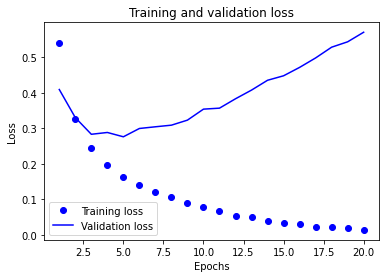

In [42]:
import matplotlib.pyplot as plt     
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**훈련과 검증 정확도 그리기**

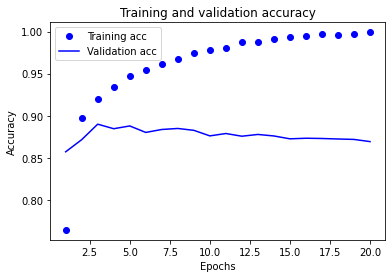

In [38]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**모델을 처음부터 다시 훈련하기**

In [39]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 13ms/step - loss: 0.4511 - accuracy: 0.8163
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2673 - accuracy: 0.9062
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2109 - accuracy: 0.9244
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2957 - accuracy: 0.8819


In [40]:
results

[0.29571208357810974, 0.8819199800491333]

### 훈련된 모델로 새로운 데이터에 대해 예측하기

In [41]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.1523226 ],
       [0.9994167 ],
       [0.7219718 ],
       ...,
       [0.08874003],
       [0.05758105],
       [0.57788754]], dtype=float32)

### 추가 실험

### 정리

## 뉴스 기사 분류: 다중 분류 문제   (p.160)





### 로이터 데이터셋

**로이터 데이터셋 로드하기**

In [49]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [50]:
len(train_data)

8982

In [51]:
len(test_data)

2246

In [52]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**로이터 데이터셋을 텍스트로 디코딩하기**

In [53]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [54]:
train_labels[10]

3

In [72]:
train_labels[0]

3

In [71]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### 데이터 준비

**데이터 인코딩하기**

In [55]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [75]:
x_train.shape

(8982, 10000)

In [77]:
x_train[3]

array([0., 1., 1., ..., 0., 0., 0.])

**레이블 인코딩하기**

In [56]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [79]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [80]:
y_train[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**or**

In [81]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [82]:
train_labels[0]

3

### 모델 구성

**모델 정의하기**

In [58]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**모델 컴파일하기**

In [83]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### 훈련 검증

**검증 세트 준비하기**

In [90]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**모델 훈련하기**

In [91]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 27ms/step - loss: 0.3222 - accuracy: 0.9293 - val_loss: 0.3005 - val_accuracy: 0.9440
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 0.2830 - accuracy: 0.9369 - val_loss: 0.2922 - val_accuracy: 0.9350
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 0.2410 - accuracy: 0.9444 - val_loss: 0.3660 - val_accuracy: 0.9040
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.2173 - accuracy: 0.9478 - val_loss: 0.3222 - val_accuracy: 0.9330
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.1993 - accuracy: 0.9503 - val_loss: 0.3293 - val_accuracy: 0.9270
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.1843 - accuracy: 0.9518 - val_loss: 0.3189 - val_accuracy: 0.9210
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.1645 - accuracy: 0.9524 - val_loss: 0.3823 - val_accuracy: 0.8960
Epoch 8/20
16

**훈련과 검증 손실 그리기**

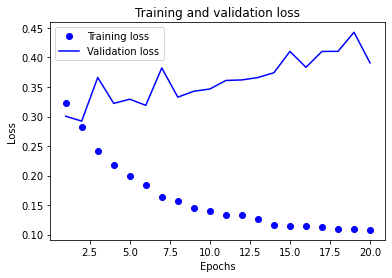

In [93]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**훈련과 검증 정확도 그리기**

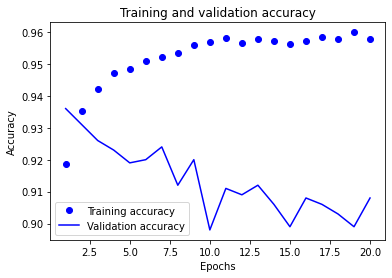

In [87]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**모델을 처음부터 다시 훈련하기**

In [94]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 13ms/step - loss: 2.7901 - accuracy: 0.4932
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.5543 - accuracy: 0.6820
Epoch 3/9
18/18 [==============================] - 0s 12ms/step - loss: 1.1732 - accuracy: 0.7511
Epoch 4/9
18/18 [==============================] - 0s 17ms/step - loss: 0.9461 - accuracy: 0.7984
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7789 - accuracy: 0.8349
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6484 - accuracy: 0.8640
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.5442 - accuracy: 0.8859
Epoch 8/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4565 - accuracy: 0.9053
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.8976 - accuracy: 0.7988


In [95]:
results

[0.8976030349731445, 0.7987533211708069]

In [96]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)    #정확도 확인
hits_array.mean()

0.19323241317898487

### 새로운 데이터로 예측하기

In [98]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [99]:
predictions[0].shape     

(46,)

In [102]:
predictions.shape     

(2246, 46)

In [103]:
np.sum(predictions[0])

1.0

In [104]:
np.argmax(predictions[0])

3

### 레이블과 손실을 다루는 다른 방법

In [97]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### 충분히 큰 중간 층을 두어야 하는 이유  (p.148)

**정보 병목이 있는 모델**

*마지막 출력이 46차원이기 때문에 중간층의 중간 유닛이 46개보다 많이 적으면 안된다.*

In [105]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 10ms/step - loss: 3.1940 - accuracy: 0.2112 - val_loss: 2.7860 - val_accuracy: 0.2340
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 2.4979 - accuracy: 0.2534 - val_loss: 2.1511 - val_accuracy: 0.2700
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.7493 - accuracy: 0.5373 - val_loss: 1.5781 - val_accuracy: 0.5770
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.3887 - accuracy: 0.6215 - val_loss: 1.4534 - val_accuracy: 0.6280
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2161 - accuracy: 0.6775 - val_loss: 1.3688 - val_accuracy: 0.6610
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0936 - accuracy: 0.7107 - val_loss: 1.3167 - val_accuracy: 0.6840
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0065 - accuracy: 0.7280 - val_loss: 1.3023 - val_accuracy: 0.6930
Epoch 8/20
63/63 [=

### 추가 실험

### 정리

## 주택 가격 예측: 회귀 문제 (p.170)

### 보스턴 주택 가격 데이터셋

**보스턴 주택 데이터셋 로드하기**

In [106]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [107]:
train_data.shape  #404개

(404, 13)

In [108]:
test_data.shape    #102개

(102, 13)

In [109]:
train_targets    #집 값

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 데이터 준비

**데이터 정규화하기**

In [115]:
train_data[0]   #13개 (13차원)

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [110]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [116]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

### 모델 구성

**모델 정의하기**

In [117]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1) #softmax, sigmoid를 쓰면 안됨(- 값이 나오기 때문에 안된다. 임의의 activation을 달아주면 됨.0부터~ )
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### K-겹 검증을 사용한 훈련 검증

**K-겹 검증하기**

In [118]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [119]:
all_scores

[2.0812201499938965,
 2.4519906044006348,
 2.3412656784057617,
 2.5354015827178955]

In [120]:
np.mean(all_scores)

2.352469503879547

**각 폴드의 검증 점수를 저장하기**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [121]:
num_epochs = 300 # 500은 너무 시간이 오래걸림
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


**K-겹 검증 점수 평균을 기록하기**

In [123]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [124]:
len(all_mae_histories)

4

**검증 점수 그래프 그리기**

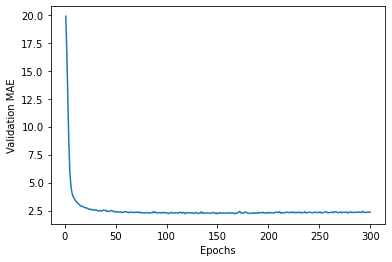

In [125]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**처음 10개의 데이터 포인트를 제외한 검증 점수 그래프 그리기**

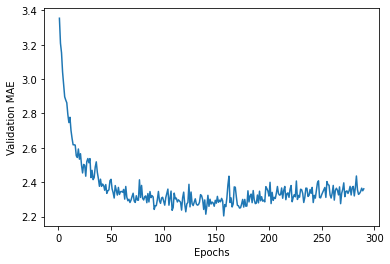

In [126]:
truncated_mae_history = average_mae_history[10:]   #앞에 10개를 제외한 나머지
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**최종 모델 훈련하기**

In [127]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 16.8914 - mae: 2.6625


In [129]:
test_mae_score

2.6625115871429443

### 새로운 데이터에 대해 예측하기

In [128]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([8.646439], dtype=float32)

### 정리

## 요약